- **Net Promoter Score (NPS)** is an indicator to measure the customer's loyalty. **NPS** is a metric that assesses the willingness of the customers to recommend a company's products or services to other people. **NPS** metric used by many companies to track cuutomer's satisfaction. The main aim is to identify customers who are less satisfied with the customer experience or product and transform them into the company's promoters. The higher the **NPS**, the greater the customer has loyalty towards a company, brand or service etc. 

### How to calculate Net Promoter Score?
   - **NPS** calculation is based on a customer survey. In the survey one question is mostly framed as "On a scale of 0 to 10, how likely would you recommend our product/service to other people?"
   - Based on their responses, all respondents are broken down in three categories:
       - **Detractors:** Customers who rate your product in the range **(0-6)**, Are those customers who are unhappy and spread negative reviews about your product/service. 
       - **Passive:** who give response **(7-8)**. Satisfied but unenthusiastic customers who can be taken by competitors.
       - **Promoters:** who give response **(9-10)**. Loyal customers who can spread positive reviews of a company.
    
   - The range of Detractor, Passive and Promoter are generally defined by the company. Companies set their range according to the business need.     
   - **Net Promoter Score = Promoter(%) - Detractors(%)** 
   - The higher the **NPS** is associated with healthier and more successful busniesses.
   
### From this dataset, we calculate the Net Promoter Score(NPS) on monthly basis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nps = pd.read_csv("nps.csv")

In [3]:
nps.head()

,event_date,user_id,score
0,2020-01-01 19:00:51,290067447,8
1,2020-01-02 17:34:43,223014806,10
2,2020-01-02 19:11:55,187864388,10
3,2020-01-02 19:27:00,318758952,8
4,2020-01-02 21:42:19,189933311,0


In [4]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
event_date    3326 non-null object
user_id       3326 non-null int64
score         3326 non-null int64
dtypes: int64(2), object(1)
memory usage: 78.1+ KB


- To work with the event_date column firstly we convert its datatype into datetime. 

In [5]:
nps = pd.read_csv("nps.csv", parse_dates = ["event_date"])

In [6]:
nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326 entries, 0 to 3325
Data columns (total 3 columns):
event_date    3326 non-null datetime64[ns]
user_id       3326 non-null int64
score         3326 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 78.1 KB


- We decided to calculate the **NPS** on monthly basis. So, from the event_date column, we extract the year and month data and make a separate column **YearMonth**.

In [7]:
Year = nps["event_date"].dt.year
Month = nps["event_date"].dt.month

In [10]:
nps["YearMonth"] = Year*100 + Month

In [11]:
nps.head()

,event_date,user_id,score,YearMonth
0,2020-01-01 19:00:51,290067447,8,202001
1,2020-01-02 17:34:43,223014806,10,202001
2,2020-01-02 19:11:55,187864388,10,202001
3,2020-01-02 19:27:00,318758952,8,202001
4,2020-01-02 21:42:19,189933311,0,202001


In [13]:
nps["score"].unique()

array([ 8, 10,  0,  6,  7,  9,  5,  2,  4,  3,  1], dtype=int64)

- We make a function where we define the Detractor, Passive and Promoter

In [14]:
def category(score):
    if score in range(0,7):
        return "Detractor"
    elif score in [7,8]:
        return "Passive"
    else:
        return "Promoter"

In [16]:
nps["Category"] = nps["score"].apply(category)

In [17]:
nps.head()

,event_date,user_id,score,YearMonth,Category
0,2020-01-01 19:00:51,290067447,8,202001,Passive
1,2020-01-02 17:34:43,223014806,10,202001,Promoter
2,2020-01-02 19:11:55,187864388,10,202001,Promoter
3,2020-01-02 19:27:00,318758952,8,202001,Passive
4,2020-01-02 21:42:19,189933311,0,202001,Detractor


In [22]:
nps.groupby(["YearMonth","Category"]).size()

YearMonth  Category 
202001     Detractor     31
           Passive       82
           Promoter     215
202002     Detractor     22
           Passive       90
           Promoter     161
202003     Detractor     33
           Passive       72
           Promoter     125
202004     Detractor     36
           Passive       87
           Promoter     178
202005     Detractor     33
           Passive       83
           Promoter     191
202006     Detractor     32
           Passive       80
           Promoter     215
202007     Detractor     48
           Passive       95
           Promoter     258
202008     Detractor     40
           Passive      103
           Promoter     256
202009     Detractor     18
           Passive       68
           Promoter     135
202010     Detractor     36
           Passive       83
           Promoter     177
202011     Detractor     18
           Passive       27
           Promoter      72
202012     Detractor     22
           Passive       42

In [28]:
nps_df = nps.pivot_table(index = "YearMonth", columns = "Category", aggfunc = "size")

In [29]:
nps_df

Category,Detractor,Passive,Promoter
YearMonth,,,
202001,31,82,215
202002,22,90,161
202003,33,72,125
202004,36,87,178
202005,33,83,191
202006,32,80,215
202007,48,95,258
202008,40,103,256
202009,18,68,135


In [31]:
nps_df["Total"] = nps_df.sum(axis = 1)

In [32]:
nps_df

Category,Detractor,Passive,Promoter,Total
YearMonth,,,,
202001,31,82,215,328
202002,22,90,161,273
202003,33,72,125,230
202004,36,87,178,301
202005,33,83,191,307
202006,32,80,215,327
202007,48,95,258,401
202008,40,103,256,399
202009,18,68,135,221


In [35]:
nps_df["NPS"] = (nps_df["Promoter"]*100/nps_df["Total"]) - (nps_df["Detractor"]*100/nps_df["Total"])

In [36]:
nps_df

Category,Detractor,Passive,Promoter,Total,NPS
YearMonth,,,,,
202001,31,82,215,328,56.097561
202002,22,90,161,273,50.915751
202003,33,72,125,230,40.000000
202004,36,87,178,301,47.176080
202005,33,83,191,307,51.465798
202006,32,80,215,327,55.963303
202007,48,95,258,401,52.369077
202008,40,103,256,399,54.135338
202009,18,68,135,221,52.941176


### Graphical representation of NPS

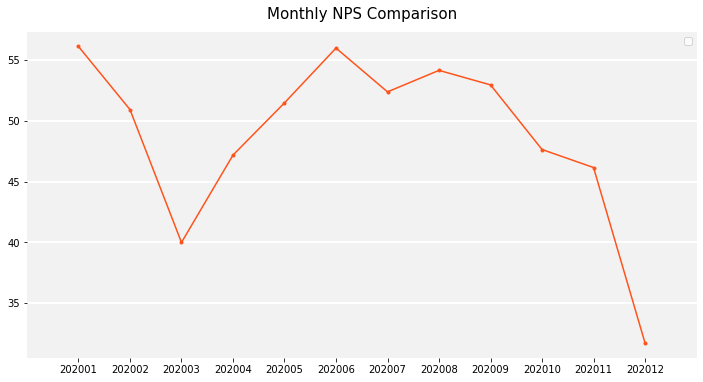

In [98]:
ax = nps_df.reset_index().plot(x = "YearMonth", y = "NPS", kind = "line", figsize = (12,6), marker = ".",
                               color = "#ff531a")
plt.title("Monthly NPS Comparison", fontsize = 15, y = 1.02)
ax.set_xticks(nps_df.index)
ax.set_xticklabels(nps_df.index)
ax.set_xlabel("")
ax.set_xlim(202000,202013)
ax.legend("")
ax.set_facecolor(color = "#f2f2f2")
ax.grid(linestyle = "-", linewidth = 2 , color = "white", axis = "y",)
for value in ax.spines.values():
    value.set_visible(False)



plt.savefig("Monthly NPS Comparison.png")
plt.show()

### CONCLUSION:
 - We can see that the NPS varies every month, from high to low. From the starting year, NPS is higher but we can see that at the end of the year NPS is at its lowest point. From that, we can say that customers are not satisfied with the business products or services. Or maybe the company was changed their policy, product/service rates or make new strategies that didn't work for them. The company should keenly observe the impact on the business due to the changes they made.  
 - It is not necessary that if NPS is low then it means your customer is not satisfied or your business is not working good. A company should compare their NPS with their industry. There is a possibility that the pandemic and the subsequent limitations have hit hard to the market but your business NPS is good as compared to other industries.
 - To understand your Net Promoter Score better, start by comparing it with the average scores within your industry, and against competitors. This is also referred to as the relative method, as opposed to the absolute method, which involves benchmarking your number to an agreed standard across industries for what a good NPS is. When comparing NPS scores, it’s important to understand what market you’re operating in. Some businesses have a more positive image than others.